# A <del>Simple</del> Least Squares Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from ipywidgets import interactive

plt.xkcd()
RANDOM_SEED = 1

## Intro

As you probably know the main task of Machine Learning algorithms is to make a predictions based on a past data. The basic scenario sounds like this:

> Imagine you have two variables: X (let it be years of experience of an ML engineer) and Y (salary of ML specialist). You want to build a model to predict the salary of an engineer based on his years of experience as the new data comes in.

This is what called a **regression** task (we are predicting **continuous** variable). Most of the times the good place to start is Linear Regression, since it's considered to be a simple and intuitive model. But how simple is that? I. Despite its simplicity, linear regression can be the worst model for prediction when it was modeled in an incorrect way. In this tutorial we are going to look at the math behind **Ordinary least squares** method, its assumptions and properties and when things can go wrong. 

In [2]:
# gernerate two random variables of size 50
n = 50
years, salary = make_regression(n_samples=n, 
                                n_features=1, 
                                noise=50, 
                                random_state=RANDOM_SEED)
years = years.reshape(n,) + 2.5
salary = salary + 1000

We have simulated two sample with years of experience and salary of size 50. Looking at the data, what would be the salary for someone with 1 year of experience? Looking at this graph or from your prior knowledge you might assume that there is a **linear** relationship between years of experience and the salary. And according to the data the most relevant guess would be in a $[800,950]$ range.

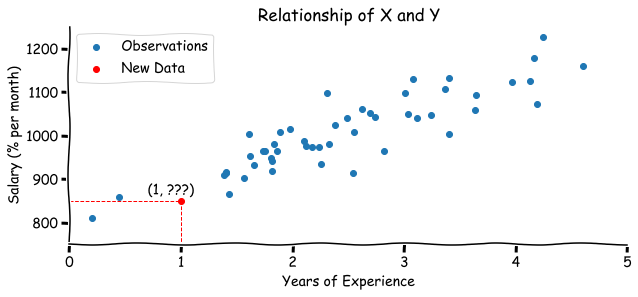

In [3]:
plt.figure(figsize=(10,4))
plt.scatter(years, salary, label='Observations')
plt.scatter([1], [850], color='red', label='New Data')
plt.text(x=0.7, y=865, s="(1, ???)")
plt.vlines(x=1, ymin=0, ymax=850, linestyle='--', 
           linewidth=1, color='red')
plt.hlines(y=850, xmin=-1, xmax=1, linestyle='--', 
           linewidth=1, color='red')

plt.xlim([0,5])
plt.ylim([750, 1250])
plt.xlabel('Years of Experience')
plt.ylabel('Salary (% per month)')
plt.title('Relationship of X and Y')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.show()

You also might remember that the line equation can we written as $y = kx + b$. In context of our problem:

$$y = \beta_0 + \beta_1 x \tag{1}$$

* $y$ - salary
* $x$ - years of experience
* $\beta_0$ - intercept (value of interception with $y$ axis) 
* $\beta_1$ - slope (the rate of change)

You can check how different values of intercept and slope affect the line in this interactive demo:

In [4]:
def simple_line_plot(intercept, slope):
    y_space = intercept + slope*x_space
    plt.figure(figsize=(8,4))
    plt.plot(x_space, y_space)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim([-10,10])
    plt.ylim([-10,10])
    plt.text(x=7, y=8, 
             s=f"y={intercept} + {slope: .1f}x", 
             color='red')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.plot()

    
x_space = np.linspace(start=-10, stop=10, num=1000)    
interactive_plot = interactive(simple_line_plot, 
                               intercept=(-5, 5), 
                               slope=(-3, 3, 0.5))
interactive_plot

interactive(children=(IntSlider(value=0, description='intercept', max=5, min=-5), FloatSlider(value=0.0, descr…

## General Form

But as we can see, even the relationship seems to be positive (as salary increases as experience goes up), the relationship is not exactly linear and there is some noise (error $\epsilon$). Let's consider a more general case when we have $k$ independent variables of $n$ observations in a matrix form. In such case:

* $y$ - is a vector of dependent (predicted) variable of size $(n \times 1)$
* $x$ - is a matrix of independent variable of size $(n \times k)$
* $\beta$ - is a vector of parameters of size $(k \times 1)$
* $\epsilon$ - is a vector of errors of size $(n \times 1)$

\begin{equation}
\begin{bmatrix}
y_1 \\ 
y_2 \\ 
... \\ 
y_n
\end{bmatrix} = 
\begin{bmatrix}
1 & x_{11} & ... & x_{k1} \\ 
1 & x_{12} & ... & x_{k2} \\ 
... & ... & ... & ... \\ 
1 & x_{1n} & ... & x_{kn}
\end{bmatrix} 
\begin{bmatrix}
\beta_1 \\ 
\beta_2 \\ 
... \\ 
\beta_k
\end{bmatrix} + 
\begin{bmatrix}
\epsilon_1 \\ 
\epsilon_2 \\ 
... \\ 
\epsilon_n
\end{bmatrix}
\tag{2}
\end{equation}

Or more simply:

$$y = X \beta + \epsilon \tag{3}$$

*Note, that the intercept is added into $\beta$ vector that's why we have a row of ones in $X$ matrix.*

The goal is to find the estimated values ($b$) of population parameters ($\beta$).

## Ordinary Least Squares

We can achieve that with the help of **Ordinary Least Squares** method. This method fits a line through the data points that minimizes the sum of the squared differences between observed values and corresponding fitted values. So we need the minimum value of mean squared error:

$$\hat{y} = X b \tag{4}$$

$$\epsilon = y - \hat{y} = y - Xb \tag{5}$$

* $\hat{y}$ - predicted values

The sum of squared residuals (**RSS**):

\begin{equation}
\begin{bmatrix}
\epsilon_1 & \epsilon_2 & ... & \epsilon_n
\end{bmatrix}
\begin{bmatrix}
\epsilon_1 \\ 
\epsilon_2 \\ 
... \\ 
\epsilon_n
\end{bmatrix}
= [\epsilon_1 \epsilon_1 + \epsilon_2 \epsilon_2 + ... + \epsilon_n \epsilon_n]
\tag{6}
\end{equation}

Since RSS is just a scalar we know that:

$$\epsilon^T = \epsilon = y - Xb = (y - Xb)^T \tag{7}$$

Then we can use this equation to find the RSS formula:

$$\epsilon^T \epsilon = (y - Xb)^T (y - Xb) $$
$$ = (y^T - X^T b^T)(y - Xb)$$
$$ = y^T y - y^T Xb - X^T b^T y + X^T b^T X b $$
$$ = y^T y - 2X^T b^T y + X^T b^T X b \tag{8}$$

To find the $b$ that minimizes the sum of squared residuals, we need to take the derivative of $\epsilon^T \epsilon$ with respect to $b$. 

$$\frac{\partial \epsilon^T \epsilon}{\partial b} = -2 X^T y + 2 X^T X b = 0 \tag{9}$$

And this gives us:

$$ X^T X b = X^T y \tag{10}$$

To find $b$ we can multiply each side of the equation by $(X^T X)^{-1}$:

$$ (X^T X)^{-1} (X^T X) b = (X^T X)^{-1} X^T y \tag{11}$$

Since by definition $(X^T X)^{-1} (X^T X) = I$, where $I$ is identity matrix with ones on a main diagonal and zeros elsewhere.

$$ I b = (X^T X)^{-1} X^T y$$

$$ b = (X^T X)^{-1} X^T y \tag{12}$$

Let's check a simple case:

\begin{equation}
X = \begin{bmatrix}
1 & 1 \\ 
1 & 2
\end{bmatrix},
y = \begin{bmatrix}
3 \\ 
5
\end{bmatrix}
\end{equation}

As we can see the regression line should be defined as $y = 1 + 2x$

Calculations:

1. 
\begin{equation}
X^T X = \begin{bmatrix}
1 & 1 \\ 
1 & 2
\end{bmatrix}
\begin{bmatrix}
1 & 1 \\ 
1 & 2
\end{bmatrix} = 
\begin{bmatrix}
2 & 3 \\ 
3 & 5
\end{bmatrix}
\end{equation}

2. 
\begin{equation}
(X^T X)^{-1} = \frac{1}{2 \times 5 - 3 \times 3} \begin{bmatrix}
5 & 3 \\ 
-3 & 2
\end{bmatrix} =
\begin{bmatrix}
5 & 3 \\ 
-3 & 2
\end{bmatrix}
\end{equation}

3. 
\begin{equation}
X^T y = \begin{bmatrix}
1 & 1 \\ 
1 & 2
\end{bmatrix} 
\begin{bmatrix}
3 \\ 
5
\end{bmatrix} = 
\begin{bmatrix}
8 \\ 
13
\end{bmatrix}
\end{equation}

4. 
\begin{equation}
(X^T X)^{-1} X^T y = 
\begin{bmatrix}
5 & -3 \\ 
-3 & 2
\end{bmatrix} 
\begin{bmatrix}
8 \\ 
13
\end{bmatrix} = 
\begin{bmatrix}
1 \\ 
2
\end{bmatrix}
\end{equation}

Exactly what we have expected!

In [5]:
# numpy calculations
x = np.array([[1, 1], [1, 2]])
y = np.array([[3], [5]])
b = np.linalg.inv(x.T@x) @ (x.T@y)
print(b)

[[1.]
 [2.]]


## Properties of OLS

If we rewrite the equation $(10)$ using $y = Xb + \epsilon$ we get:

$$ X^T X b = X^T (Xb + \epsilon) = X^T Xb + X^T \epsilon$$

$$ X^T \epsilon = 0 \tag{13}$$

Now let's take a look at the first element in $X^T \epsilon$ vector. We can see that it equals to:

$$1 \times \epsilon_1 + 1 \times \epsilon_2 + ... 1 \times \epsilon_n = 0 \tag{14}$$

Which means that **the sum of residuals $\sum_{i=1}^n \epsilon_i$ equals to 0**. The same applies for the mean $\bar{\epsilon} = 0$.

If we divide regression equation $(3)$ by number of observations $n$ we get:

$$\frac{y}{n} = \frac{X}{n}b + \frac{\epsilon}{n}$$

$$\bar{y} = \bar{x}b \tag{15}$$

Which means that **the least squares line always goes through $(\bar{x}, \bar{y})$ point**.

## Multicollinearity

Looks pretty simple so far, right? But let's take a look when things can go wrong.

Recall the equation $(12)$. There might be cases when the inverse matrix $(X^T X)^{-1}$ doesn't exist. 

* if rank\* of a matrix $X^T X$ is less then $n$, meaning that one or more of the independent variables are a linear combination of the other variables (**multicollinearity**).
* if $n<k$ (number of variables is larger than the number of observations).
* the determinant of $X^T X$ is zero.

\* The rank of a matrix is defined as the maximum number of linearly independent column vectors in the matrix or the maximum number of linearly independent row vectors in the matrix.

In [6]:
# example 1
x = np.array(
    [[1, 2, 4],
     [1, 3, 6],
     [1, 2, 5]])

print(f"Matrix rank: {np.linalg.matrix_rank(x.T@x)}")
try:
    print(f"Inverse matrix:\n{np.linalg.inv(x.T@x)}")
except np.linalg.LinAlgError as e:
    print(f"Inverse matrix doesn't exist. {e}")

Matrix rank: 3
Inverse matrix:
[[13.  1. -3.]
 [ 1.  6. -3.]
 [-3. -3.  2.]]


In [7]:
# example 2
x = np.array(
    [[1, 2, 4],
     [1, 3, 6],
     [1, 2.5, 5]])

print(f"Matrix rank: {np.linalg.matrix_rank(x.T@x)}")
try:
    np.linalg.inv(x.T@x)
except np.linalg.LinAlgError as e:
    print(f"Inverse matrix doesn't exist. {e} was given")

Matrix rank: 2
Inverse matrix doesn't exist. Singular matrix was given


In [8]:
# example 3
x = np.array(
    [[1, 2, 4],
     [1, 3, 6]])

print(f"Matrix rank: {np.linalg.matrix_rank(x.T@x)}")
try:
    print(f"Inverse matrix:\n{np.linalg.inv(x.T@x)}")
except np.linalg.LinAlgError as e:
    print(f"Inverse matrix doesn't exist. {e}")

Matrix rank: 2
Inverse matrix doesn't exist. Singular matrix


In [9]:
# example 4
x = np.array(
    [[2, 4],
     [3, 6],
     [2, 5]])

print(f"Matrix rank: {np.linalg.matrix_rank(x.T@x)}")
try:
    print(f"Inverse matrix:\n{np.linalg.inv(x.T@x)}")
except np.linalg.LinAlgError as e:
    print(f"Inverse matrix doesn't exist. {e}")

Matrix rank: 2
Inverse matrix:
[[ 5.92307692 -2.76923077]
 [-2.76923077  1.30769231]]


In the case of multicollinearity there is not going to be a single solution for $(X^T X)^{-1}$, but rather an infinite number of them.

## Making a Prediction

Now we can apply the OLS method on our experience-salary example and find out the expected salary for the engineer with 1 year of experience. 

In [10]:
# add column with ones
X = np.vstack([np.ones(shape=n), years]).T 
b = np.linalg.inv(X.T@X) @ (X.T@salary)
y_hat = X@b
print(f"Model: y ={b[0]: .2f} +{b[1]: .2f}x")

Model: y = 812.11 + 79.52x


In [11]:
# for a smooth line
x_space = np.linspace(years.min(), years.max(), 1000) 
y_space = b[0] + b[1]*x_space

# value to predict
x_new = 1
y_new = b[0] + b[1]*x_new

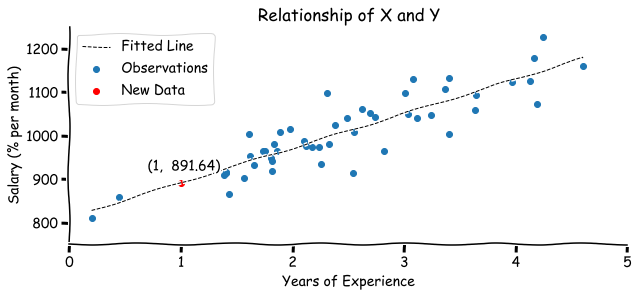

In [12]:
plt.figure(figsize=(10,4))
plt.scatter(years, salary, label='Observations')
plt.plot(x_space, y_space, '--', color='black', 
         linewidth=1, label='Fitted Line')
plt.scatter([x_new], [y_new], 
            color='red', label='New Data')
plt.text(x=0.7, y=920, s=f"(1, {y_new: .2f})")

plt.xlim([0,5])
plt.ylim([750, 1250])
plt.xlabel('Years of Experience')
plt.ylabel('Salary (% per month)')
plt.title('Relationship of X and Y')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.show()

Based on a fitted model, engineer with 1 year of experience is expected to earn 891.64$ per month. 

### `sklearn` realization

And obviously you don't have to do this calculations by hand since there is already a `sklearn` realization:

In [13]:
# sklearn realization
ols_model = LinearRegression(fit_intercept=True)
ols_model.fit(years.reshape(n,1), salary)
print(f"Model: y ={ols_model.intercept_: .2f} +{ols_model.coef_[0]: .2f}x")

Model: y = 812.11 + 79.52x


In [14]:
# prediction
print(ols_model.predict(np.array(x_new).reshape(1,1)))

[891.63525261]


## Assumptions for Linear Regression 

1. A **linear** relationship between $y$ and $X$.
2. The dependent variables $X$ should be **linearly independent** (no perfect multicollinearity).
3. Approximate **normality of residuals distribution** centered at 0, $\epsilon \sim N(0, \sigma)$, $E[\epsilon] = 0$.
4. **Constant variability** (heteroscedasticity).

Some possible ways for assumptions check:

1. Linear relationship between 2 variables can be easily inspected on a scatter plot.
2. Highly correlated variables can be found in the correlation matrix $R_{xx}$.
3. Simplest way is to plot a histogram of residuals after model was fitted. 
4. Scatter plot the residuals against the predicted values. There should be no "fan" shape or some other funny shapes.

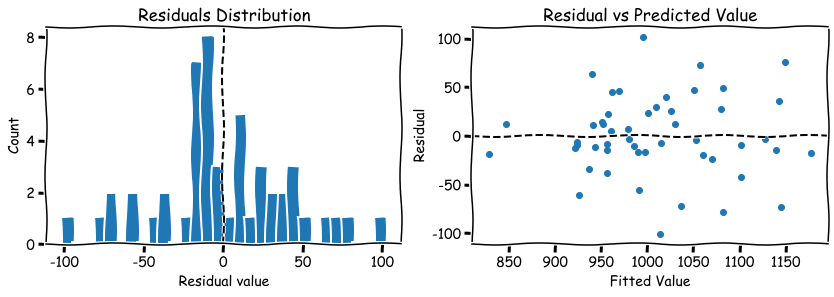

In [15]:
errors = salary - y_hat

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(errors, bins=30)
plt.axvline(0, linestyle='--', color='black')
plt.xlabel('Residual value')
plt.ylabel('Count')
plt.title('Residuals Distribution')

plt.subplot(122)
plt.scatter(y_hat, errors)
plt.axhline(0, linestyle='--', color='black')
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.title('Residual vs Predicted Value')
plt.show()

Another important piece of information to keep in mind that fitted line can be affected by **outliers**. Assume that you got the information about three new engineers. Despite the fact that they have worked for 4 years already, their salary is still low. See what happens to regression line when we include this observations into model:

In [16]:
# add 3 new points
years_outlier = np.concatenate([years, [4, 4.1, 4.2]])
salary_outlier = np.concatenate([salary, [800, 810, 900]])

# add column with ones
X = np.vstack([np.ones(shape=n+3), years_outlier]).T 
b = np.linalg.inv(X.T@X) @ (X.T@salary_outlier)
y_hat = X@b
print(f"Model: y ={b[0]: .2f} +{b[1]: .2f}x")

Model: y = 859.96 + 54.23x


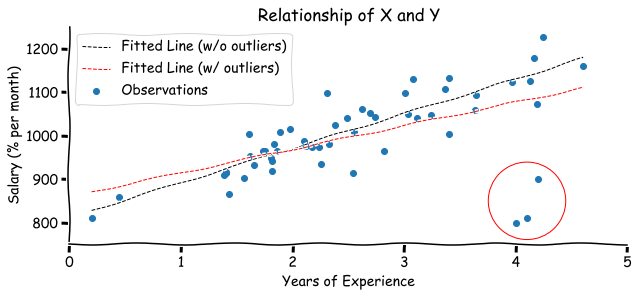

In [27]:
y_space_outlier = b[0] + b[1]*x_space

plt.figure(figsize=(10,4))
plt.scatter(years_outlier, salary_outlier, label='Observations')
plt.plot(x_space, y_space, '--', color='black', 
         linewidth=1, label='Fitted Line (w/o outliers)')
plt.plot(x_space, y_space_outlier, '--', color='red', 
         linewidth=1, label='Fitted Line (w/ outliers)')
plt.scatter(4.1, 850, s=6000, facecolors='none', edgecolors='r')
plt.xlim([0,5])
plt.ylim([750, 1250])
plt.xlabel('Years of Experience')
plt.ylabel('Salary (% per month)')
plt.title('Relationship of X and Y')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.show()

There are two possible types of outliers:

1. **Leverage point** - observation that is located away from the point cloud, but *doesn't affect* the slope of the regression line.
2. **Influential point** - observation that *affects* the slope of the regression line.

## Goodness of Fit

After you have fitted the model you might want to check how good your model is. One of the most common metrics is **R square** (coefficient of determination), which shows the percentage of dependent variable variation explained by the model. It can be find as:

$$R^2 = r_{xy}^T R_{xx}^{-1} r_{xy} \tag{16}$$

* $r_{xy}$ - vector of correlations between independent variables and dependent variable $[r_{x_1y} r_{x_2y} ... r_{x_ky}]^T$
* $R_{xx}$ - correlation matrix between predictor variables

\begin{equation}
R = \begin{bmatrix}
r_{x_1 x_1} & r_{x_1 x_2} & ... & r_{x_1 x_k} \\ 
r_{x_2 x_1} & r_{x_2 x_2} & ... & r_{x_2 x_k} \\ 
... & ... & ... & ... \\
r_{x_k x_1} & r_{x_k x_2} & ... & r_{x_k x_k} \\
\end{bmatrix}
\tag{17}
\end{equation}

If there is only one independent variable $x$, then $R^2$ equals to squared correlation value between $x$ and $y$.

However, there are some limitations of $R^2$ - it always increases whenever a new variable is added to the model. So even if you add some irrelevant feature to $X$ (for example height of the person for salary prediction) $R^2$ will stay the same of van even increase a bit.

In [18]:
r_xy = np.corrcoef(years, salary)[0, 1] # correlation
R_sq = r_xy**2

print(f"{R_sq*100: .2f}% of salary variance change can be explained by the model.")

 78.19% of salary variance change can be explained by the model.


In [19]:
# sklearn
print(f"R-squared: {ols_model.score(years.reshape(n,1), salary): .4f}")

R-squared:  0.7819


Example with 5 predictors:

In [20]:
k = 5
x, y = make_regression(n_samples=n, n_features=k, 
                       noise=50, random_state=RANDOM_SEED)
x = np.concatenate([np.ones(shape=(n,1)), x], axis=1)

In [21]:
r_xy = np.corrcoef(x[:,1:], y, rowvar=False)[-1, :-1]
R_xx = np.corrcoef(x[:, 1:], rowvar=False)
R_sq = r_xy.T@np.linalg.inv(R_xx)@r_xy

print(f"{R_sq*100: .2f}% of salary variance change can be explained by the model.")

 73.76% of salary variance change can be explained by the model.


In [22]:
# sklearn realization
ols_model = LinearRegression(fit_intercept=False)
ols_model.fit(x, y)
print(f"R-squared: {ols_model.score(x, y): .4f}")

R-squared:  0.7376


## Summary

To sum it up we can generalize steps for OLS regression model fitting steps:

* Before the fitting:
  1. Check the relationship between dependent and independent variables. It should be linear.
  2. Check the relationship between each independent variables combinations. No variable should be a linear combination of another.
  2. Check for outliers.
* After the fitting:
  1. Check the distribution of residuals (errors). It should be normal with the center at zero.
  2. Check for the constant variance (no weird patterns on a residual-fitted value plot).
  3. Check your $R^2$.